<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
<h1> Python Analysis Project </h1>
<em>Introduction to Python | Individual Assignment</em><br><br>

Maria Camila Toledo - Marketing and Analytics <br>
Hult International Business School <br>
May 2025

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
This analysis is meant to understand what are some factors that affect the business of bike rental and with this, make data driven strategic decisions. Some of the questions to take into account include the weather conditions that are most favorable for an increase in demand of bike rentals. Through this analysis, its been taken into account 3 conditions like: Temperature, Seasons, and whether it is a holiday or not. Decisions will be focused on a Marketing perspective as how the bike rentals should run their campaigns keeping in mind customers behaviors. Finally, data will be presented in different data visualizations for easier understanding.
<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


In [2]:

# importing packages
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # NEW: data visualization essentials
import seaborn as sns # NEW: enhanced data visualization

# suppressing user warnings
import warnings # warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Specifying the file name 'bikes'

bikes = pd.read_excel("bikes_data.xlsx")

# output of the first 5 rows of the dataset for checking
bikes.head(n = 5)


,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Season,Holiday,RENTALS
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,Winter,Yes,221
1,2,Jan,Sunday,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,Winter,Yes,268
2,3,Jan,Sunday,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,Winter,Yes,335
3,4,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,0.0,Winter,Yes,299
4,5,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,0.0,Winter,Yes,225


In [4]:
# Mapping dictionaries
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

day_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}

holiday_mapping = {
    'No': 0, 'Yes': 1
}

season_mapping = {
    "Winter": 1,
    "Spring": 2,
    "Summer": 3,
    "Autumn": 4
}


# Applying the mappings
bikes["Month"]       = bikes["Month"].map(month_mapping)
bikes["Day of Week"] = bikes["Day of Week"].map(day_mapping)
bikes["Holiday"]     = bikes["Holiday"].map(holiday_mapping)
bikes["Season"]      = bikes["Season"].map(season_mapping)

# View the transformed data
bikes.head()

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Season,Holiday,RENTALS
0,1,1.0,7,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,1,1,221
1,2,1.0,7,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,1,1,268
2,3,1.0,7,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,1,1,335
3,4,1.0,7,17,1.8,33,3.3,1913,-12.8,0.18,0.0,0.0,1,1,299
4,5,1.0,7,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,0.0,1,1,225


It is important to change every variable into numbers by mapping each one of them. This is so a correlation can be run to determine which are the most important variables related to RENTALS

In [3]:
# Drop the 'ID' column before calculating correlation
bikes_no_id = bikes.drop(columns=["ID"])

# Calculate the correlation matrix using only numeric columns
correlation_table = bikes_no_id.corr(numeric_only=True).round(2)

# Reset the index to turn the matrix into a table-style format
correlation_table_formatted = correlation_table.reset_index()

# Rename the index column to "Variable" (to match the row name style)
correlation_table_formatted = correlation_table_formatted.rename(columns={"index": "Variable"})

# Display the first few rows of the correlation table
correlation_table_formatted

,Variable,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Season,Holiday,RENTALS
0,Month,1.00,0.04,0.04,0.28,0.12,-0.15,0.09,0.28,-0.03,-0.01,0.01,0.59,0.05,0.25
1,Day of Week,0.04,1.00,0.04,0.04,-0.01,-0.06,-0.03,0.03,0.01,0.03,-0.07,0.02,-0.02,-0.06
2,Hour,0.04,0.04,1.00,0.11,-0.25,0.27,0.15,-0.01,0.14,0.02,-0.06,0.02,0.01,0.42
3,Temperature,0.28,0.04,0.11,1.00,0.17,-0.04,0.06,0.91,0.34,0.05,-0.25,0.60,-0.08,0.55
4,Humidity,0.12,-0.01,-0.25,0.17,1.00,-0.33,-0.54,0.55,-0.47,0.19,0.11,0.15,-0.07,-0.22
5,Wind Speed,-0.15,-0.06,0.27,-0.04,-0.33,1.00,0.17,-0.17,0.31,-0.02,-0.01,-0.16,0.02,0.12
6,Visibility,0.09,-0.03,0.15,0.06,-0.54,0.17,1.00,-0.16,0.17,-0.12,-0.08,0.16,0.03,0.24
7,Dew Point Temperature,0.28,0.03,-0.01,0.91,0.55,-0.17,-0.16,1.00,0.08,0.11,-0.17,0.58,-0.10,0.38
8,UV Index,-0.03,0.01,0.14,0.34,-0.47,0.31,0.17,0.08,1.00,-0.06,-0.08,0.12,-0.03,0.25
9,Rainfall,-0.01,0.03,0.02,0.05,0.19,-0.02,-0.12,0.11,-0.06,1.00,0.00,0.02,-0.02,-0.11


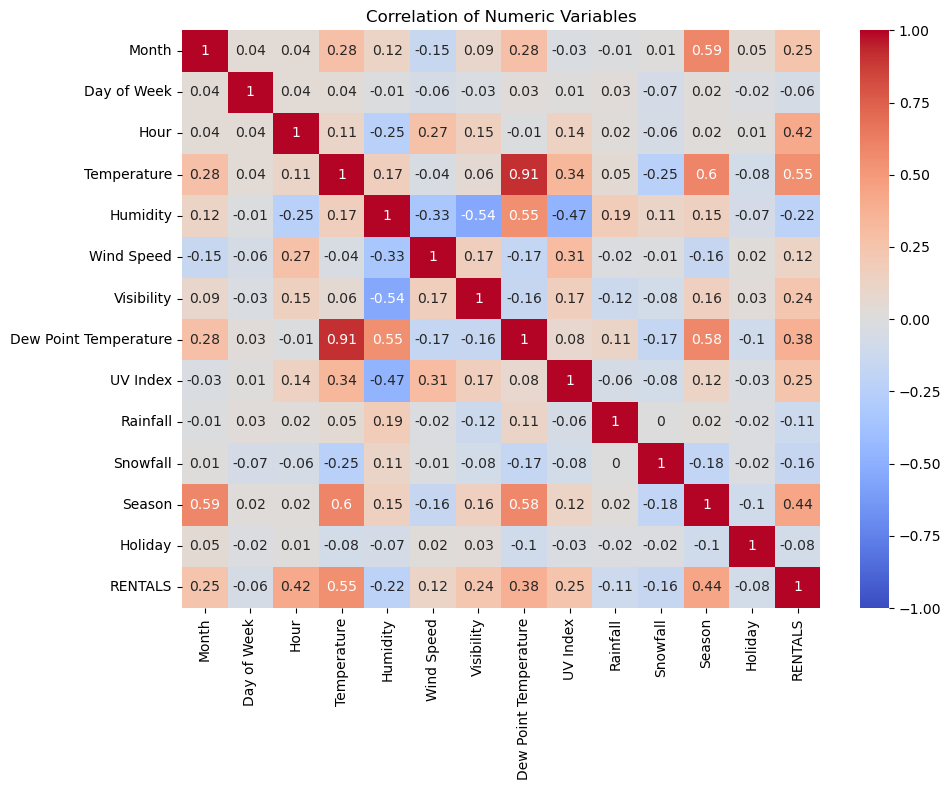

In [8]:
# Drop the 'ID' column
bikes_no_id = bikes.drop(columns=["ID"])

# Compute the correlation matrix
correlation_matrix = bikes_no_id.corr(numeric_only=True).round(2)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar=True)

plt.title("Correlation of Numeric Variables")
plt.tight_layout()
plt.show()

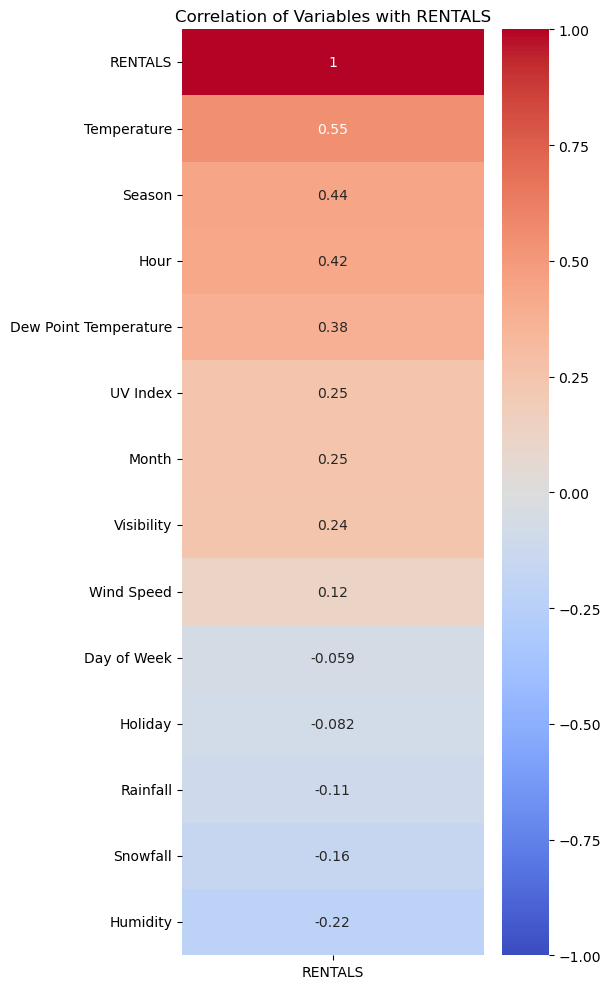

In [9]:
# Calculating correlation using only numeric columns
corr = bikes_no_id.corr(numeric_only=True)

# Selecting only the correlation with 'RENTALS'
corr_rentals = corr[["RENTALS"]].sort_values(by="RENTALS", ascending=False)

# Generating the heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(corr_rentals, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar=True)

plt.title("Correlation of Variables with RENTALS")
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
According to the heatmap run for correlations, it is clear that Temperature is the variable that is considered the
most from people renting bikes, followed by Season and hour. Also its important to see which are some variables
that are not contributing significantly to bike rentals like humidity, snowfall and Rainfall. As marketers, 
bike rental business should focus on the variables with the most correlation for decision making. From this its 
visible how bike rentals tend to increase in certain temperatures and hours of the day. For customers some factors are not a reason to stop renting bikes so we can discard these options too.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

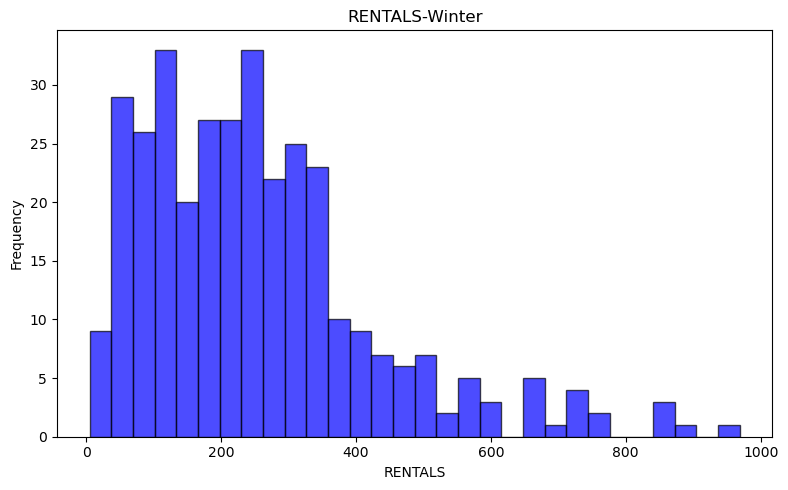

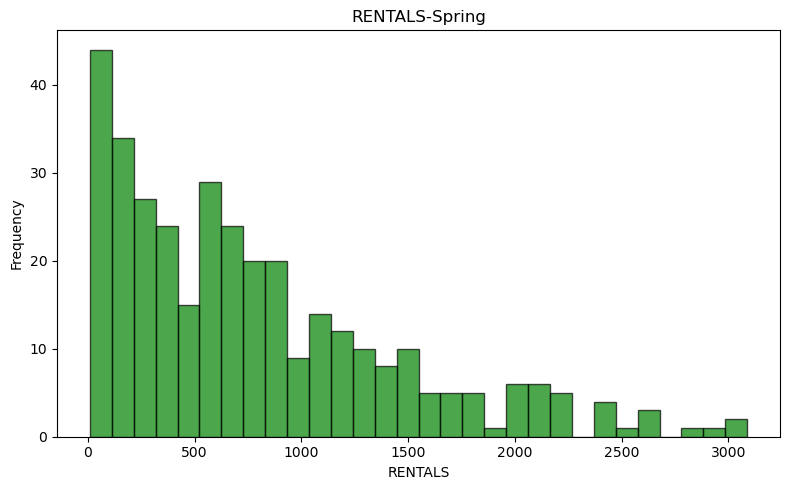

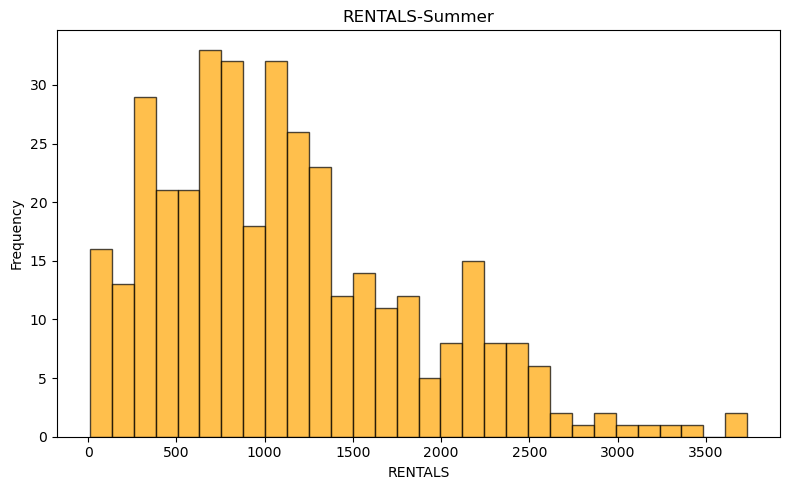

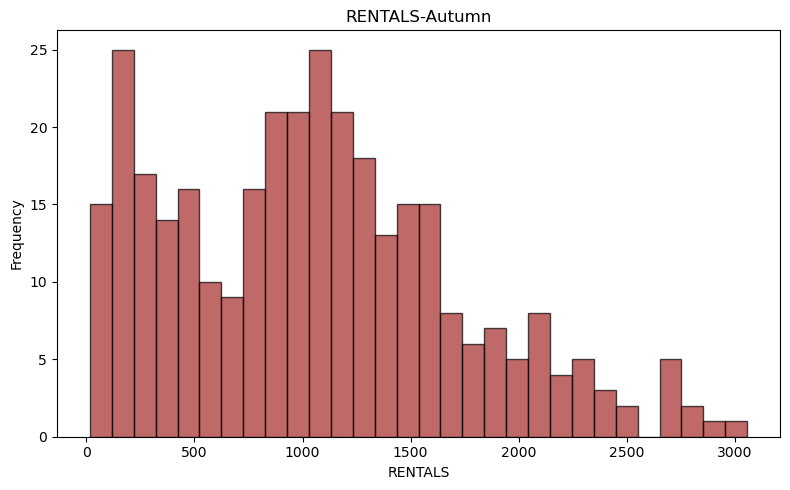

In [21]:
# Creating Season_Label column from numerical Season
season_labels = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Autumn"}
bikes["Season_Label"] = bikes["Season"].map(season_labels)

# Dictionary of colors by Season
season_colors = {
    "Winter": "blue",
    "Spring": "green",
    "Summer": "orange",
    "Autumn": "brown"
}

# Season_Label to a categorical variable because can only use .cat accessor with a 'category' dtype
bikes["Season_Label"] = pd.Categorical(
    bikes["Season_Label"],
    categories=["Winter", "Spring", "Summer", "Autumn"],
    ordered=True
)

# Loop to generate a bar graph by Season
for season in bikes["Season_Label"].cat.categories:
    subset = bikes[bikes["Season_Label"] == season]

# formatting and displaying the bar graph    
    plt.figure(figsize=(8, 5))
    plt.hist(subset["RENTALS"], bins=30, color=season_colors[season], edgecolor='black', alpha=0.7)

    plt.title(f"RENTALS-{season}")
    plt.xlabel("RENTALS", )
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
There is a histogram to see the frequency of rentals for each season, Summer clearly shows a skewness to higher 
number of rentals compared to other seasons. Winter as expected, shows less frequency on bike rentals. Spring and 
Autumn have higher frequency of rentals than winter but there is not a big difference between them. It is important to
keep in mind each season's peak in order to make the right marketing decisions. In this case it is important to make 
awareness campaigns during the colder months but focus in Summer and Spring where customers are renting more bikes.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

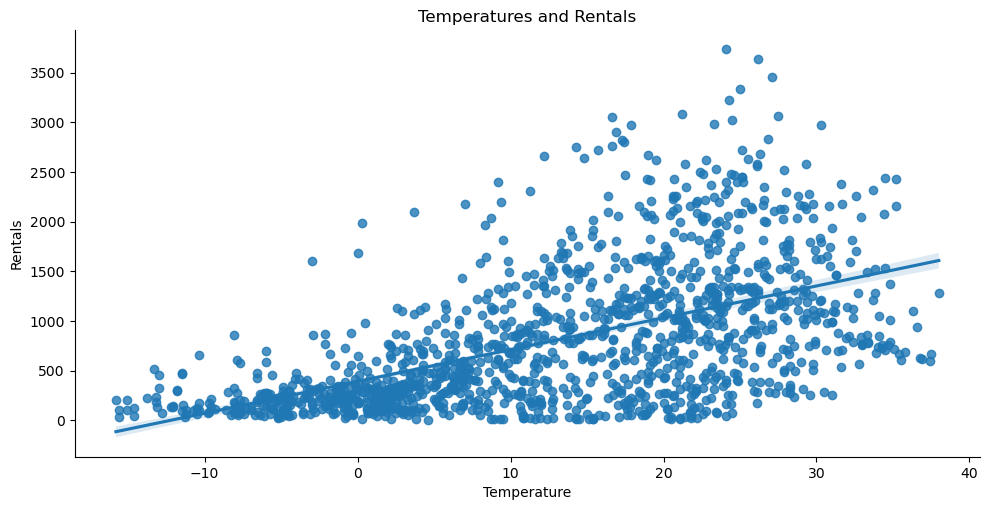

In [50]:
# instantiating an lmplot for carat and price
sns.lmplot(x       = 'Temperature' , # x-axis feature
           y       = 'RENTALS' , # y-axis feature
           hue     = None    , # categorical data for subsets
           scatter = True    , # renders a scatter plot
           fit_reg = True    , # renders a regression line
           aspect  = 2       , # aspect ratio for plot
           data    = bikes) # DataFrame where features exist


# formatting and displaying the visualization
plt.title       (label  = 'Temperatures and Rentals')
plt.xlabel      (xlabel = 'Temperature'             )
plt.ylabel      (ylabel = 'Rentals'                 )
plt.show        (block  = True                      )

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
According to this scatter plot, there is a higher concentration of rentals in temperatures from -10 to 10 degrees. As temperatures rise, rentals tend to seem more dispersed. There is a positive linear relationship between Rentals and Temperature. Assuming temperature is measured in Celsius degrees, there might be some outliers from higher temperatures up to 40 degrees which is the hottest temperature in the dataset. This might be due to other factors affecting in a positive way rentals.



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
Analysis Questions:

The users are usually influenced by environmental issues and functional aspects but its clear one of the main leads is that they want to use an enjoyable transportation, especially in good weather. The figures show that there is a strong correlation between increased temperatures and increased number of bikes rented. Because of this, cyclists choose to rent bikes based on their weather conditions that lead them to an enjoyable experience. This suggests that most people see cycling as a form of recreational transportation as they get outside, enjoy themselves, and be active. Cycling use probably offers the functional aspect of daily commuting or local travel. Functionality, fun, and weather might be a determinant in the customer experience of most bike renters.


Analysis shows that some weather conditions significantly influence and drive high bike rental demand. Temperature is the most powerful, as rising temperatures create a strong correlation with increased rental volumes and suggest that consumers will have a greater tendency to rent bicycles when the weather is agreeable to outdoor activities, and comfortable mode of transport. While data presents a pretty strong case in support of temperature, it also suggests that other conditions exist that are important as well as noteworthy. For example, the analysis reported a weak negative correlation with humidity. The optimal overall weather conditions to enable high bike rental demand could be moderate temperatures with minimal humidity to enable excellent cycling.

The company needs to be responsive to the trends identified in the data. First, marketing must be highly focused on seasons with ideal weather like spring and summer, to capture demand. This can take the shape of specific promotional campaigns enticing customers to experience riding in favourable weather conditions. Second, the company must have some flexible pricing whereby prices change based on weather, potentially offering discounts on bad weather days to instigate rentals. Operationally, the company must have high levels of bike availability and staffing during peak times. Finally, the company must use analytics to predict surges in demand, allocate resources in anticipation, and be in a proactive position to otherwise respond to customers' demand.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

Conclusions:
To conclude this analysis, the key takeaways are that temperature is the variable that is most important to customers. Seasonality matters, hourly trends are important, and factors like Holidays dont affect in a positive or negative way the bike rentals. Keeping all this in mind, bike rentals businesses have to create marketing campaigns focused on temperature and weather. Inviting customers during warmer temperatures with messages like "The perfect weather for the perfect ride" that will trigger emotion for things that are valuable for them. 
As a result, the bike rental businesses must focus on building promotional strategies that highlight the value of cycling in ideal temperature conditions. The analytical approach will help the firms effectively take advantage of consumer demand, focus their resources, and ultimately reach a higher profit margin.
<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
References:


Windy.app. (n.d.). Bicycle riding temperature. Retrieved May 19, 2025, from 
<a href="https://windy.app/blog/bicycle-riding-temperature.html">https://windy.app/blog/bicycle-riding-temperature.html</a><br><br><br>

cyclingfanatic42. (2023, February 2). What temperature does it need to be to be? r/cycling. Reddit. Retrieved May 19, 2025, from 
<a href="https://www.reddit.com/r/cycling/comments/10s0rix/what_temperature_does_it_need_to_be_to_be/">https://www.reddit.com/r/cycling/comments/10s0rix/what_temperature_does_it_need_to_be_to_be/</a><br><br><br>

Young, D. S., & Zhao, J. (2021). Predicting Daily Rental Counts For Bike-Sharing Programs. Consortium for the Advancement of Undergraduate Statistics Education. Retrieved from 
href="https://www.causeweb.org/usproc/sites/default/files/usclap/2021-2/Predicting%20Daily%20Rental%20Counts%20For%20Bike-Sharing%20Programs.pdf">https://www.causeweb.org/usproc/sites/default/files/usclap/2021-2/Predicting%20Daily%20Rental%20Counts%20For%20Bike-Sharing%20Programs.pdf</a><br><br><br>